* **pygad** is a python library for implementing the genetic algorithm.


* **kerasga** module has helper a class and 2 functions to train models using the genetic algorithm.

In [2]:
#Importing the necessary libraries
import pygad
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Input
from pygad import kerasga
from keras.losses import BinaryCrossentropy
from pygad import GA
import seaborn as sns
from sklearn.metrics import confusion_matrix,auc

In [11]:
inputs = [0.4,1,0,7,8]
desired_output = 32

In [12]:
def fitness_func(solution,solution_idx):
    output = np.sum(solution * inputs)
    fitness = 1.0 / (np.abs(output - desired_output) + 0.000001) #np.abs calculate the absolute value elementwise.
    
    return fitness

* **sol_per_pop parameter is the number of solutions in the population.**

In [13]:
ga_instance = pygad.GA(num_generations=100, sol_per_pop=10, num_genes=len(inputs), num_parents_mating=2, fitness_func=fitness_func, mutation_type='random',mutation_probability=0.6)

In [14]:
ga_instance.run()

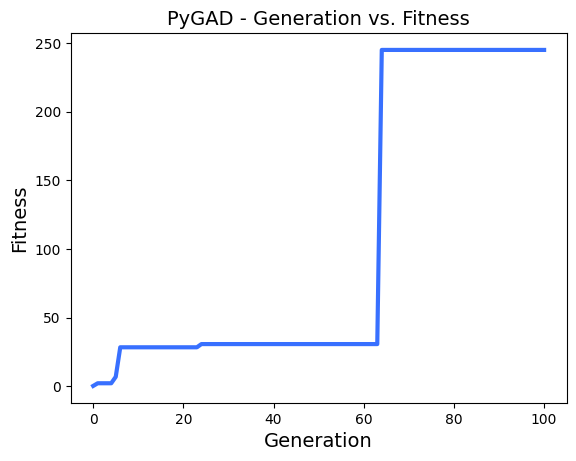

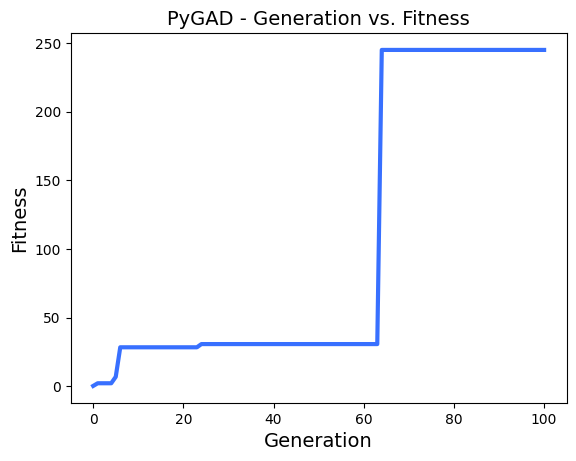

In [15]:
ga_instance.plot_fitness()

In [17]:
#Loading the dataset
diabetes = load_breast_cancer(as_frame=True)
data = diabetes['data']
target = diabetes['target']
data.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [19]:
#Exploring the dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [21]:
data.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [23]:
#Splitting the dataset into training and testing
seed = 1234
x_train,x_test,y_train,y_test = train_test_split(data,target,random_state=seed)

In [24]:
#Creation of the neural network model
model = Sequential()
model.add(Input(x_train.shape[1]))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [26]:
#Creating a keras compatible genetic algorithm
keras_ga = kerasga.KerasGA(model=model, num_solutions=15)

* **global variable** are variables that are created outside the function are known as global variables.


* If we create a variable with the same name inside a function, this variable will be local, and can only be used inside the function. The global variable with the same name will remain as it was, global and with the original value.

In [32]:
def fitness_func(solution,solution_idx):
    global model
    
    #Get the weights from the model
    weights = kerasga.model_weights_as_matrix(model=model,weights_vector=solution)
    
    #Set the weights
    model.set_weights(weights = weights)
    
    #Make the prediction
    prediction = model.predict(x_train)
    
    #Calculate fitness
    entropy = BinaryCrossentropy()(y_train,prediction)
    fitness = 1/(entropy.numpy() + 0.000001)
    
    return fitness

In [37]:
fitness_evol=[]

def callback_generation(ga_instance):
    global fitness_evol
    
    fitness_evol.append(ga_instance.best_solution()[1])
    generation = ga_instance.generations_completed
    
    if generation %1 == 0:
        print(f"Generation {generation}.Fitness:{ga_instance.best_solution()[1]}")

In [38]:
num_generations = 5
num_parents_mating = 5
initial_population = keras_ga.population_weights

In [39]:
ga_optimizer = GA(num_generations=num_generations, num_parents_mating=num_parents_mating,
                  initial_population=initial_population, fitness_func=fitness_func,on_generation=callback_generation)

In [40]:
ga_optimizer.run()

14/14 [==============================] - 0s 2ms/step
Generation 1.Fitness:0.32642501835905047
14/14 [==============================] - 0s 2ms/step
Generation 2.Fitness:0.32642501835905047
14/14 [==============================] - 0s 3ms/step
Generation 3.Fitness:0.32642501835905047
14/14 [==============================] - 0s 1ms/step
Generation 4.Fitness:0.32642501835905047
14/14 [==============================] - 0s 1ms/step
Generation 5.Fitness:0.34267550151605186


<AxesSubplot: >

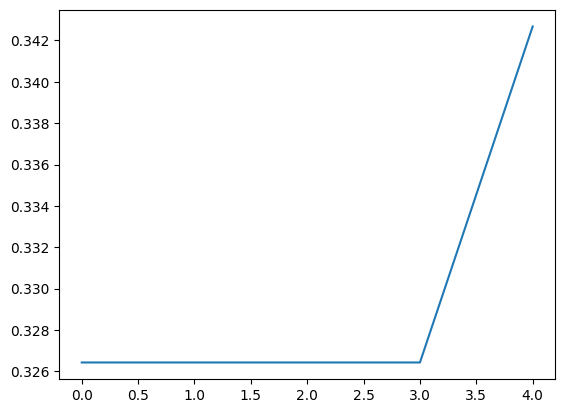

In [41]:
sns.lineplot(x=range(len(fitness_evol)),y=fitness_evol)

In [42]:
pred = model.predict(x_test)
pred

5/5 [==============================] - 0s 3ms/step


array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [43]:
classes = np.argmax(pred,axis=1)
classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [44]:
confusion_matrix(y_test,classes)

array([[55,  0],
       [88,  0]], dtype=int64)

In [48]:
margin = np.array([2,2.5])
material_consumption = np.array([2,3])
material_max = 500

def fitness_func(solution,solution_idx):
    solution_added = solution + 50
    calculated_margin = np.sum(solution_added * margin)
    material_consumed = np.sum(solution_added * material_consumption)
    
    if material_consumed > material_max:
        return 0
    else:
        return calculated_margin

In [49]:
#Checking for solutions
print(f"Fitness for correct scenario:{fitness_func(np.array([0,0]), '')}")
print(f"Fitness for incorrect scenario:{fitness_func(np.array([0,1]), '')}")

Fitness for correct scenario:225.0
Fitness for incorrect scenario:227.5


In [51]:
ga_instance = pygad.GA(num_generations=1000, sol_per_pop=10, num_genes=2, num_parents_mating=2, fitness_func=fitness_func,
                      mutation_type='random',mutation_probability=0.6)

In [53]:
ga_instance.run()

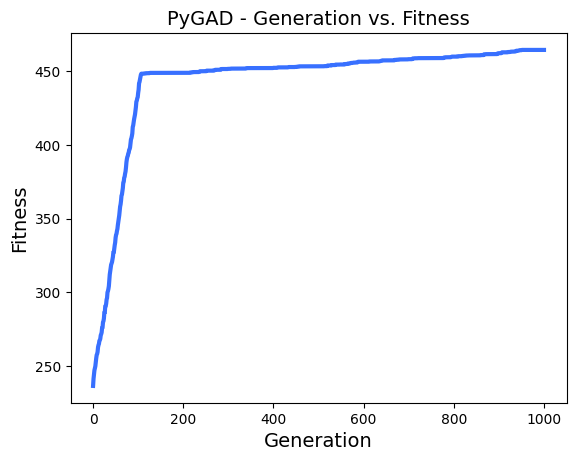

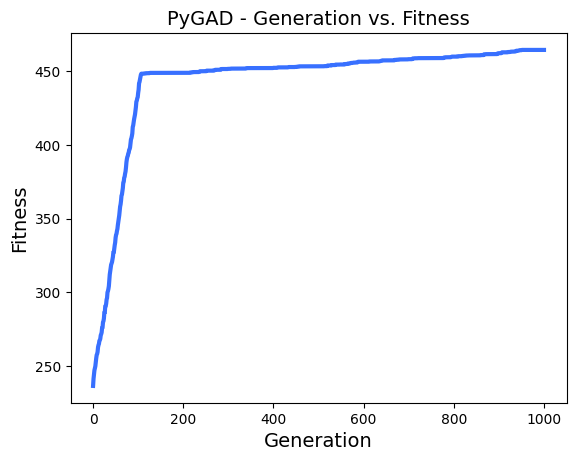

In [54]:
ga_instance.plot_fitness()

In [55]:
#Checking for optimal solutions
ga_instance.best_solution()[0] + 50

array([143.18976793,  71.19622467])